In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv("covid19_tweets.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Exploratory Data Analysis

### Add country analysis

In [59]:
data_cleaned = data.copy()

In [60]:
country_data = pd.read_csv("countries.csv")

In [61]:
data_cleaned["country"] = country_data["country"]
data_cleaned["country"] = data_cleaned["country"].fillna("Other")

### Add misinformation analysis

In [62]:
data_cleaned["is_misinformation"] = ""

In [63]:
is_misinformation_df1 = pd.read_csv("misinformation_part1.csv")
is_misinformation_df1

,tweet_content
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [64]:
data_cleaned["is_misinformation"][:10_000] = is_misinformation_df1["tweet_content"]

<ipython-input-64-b8d8f9427d4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["is_misinformation"][:10_000] = is_misinformation_df1["tweet_content"]


In [65]:
is_misinformation_df2 = pd.read_csv("misinformation_part2.csv")
is_misinformation_df2

,tweet_content
0,False
1,False
2,False
3,False
4,False
...,...
10431,False
10432,False
10433,False
10434,False


In [66]:
data_cleaned["is_misinformation"][64_000:] = is_misinformation_df2["tweet_content"]

<ipython-input-66-3a8e868aca35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["is_misinformation"][64_000:] = is_misinformation_df2["tweet_content"]


In [67]:
is_misinformation_df3 = pd.read_csv("misinformation_part3.csv")
is_misinformation_df3

,tweet_content
0,True
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [68]:
data_cleaned["is_misinformation"][10_000:20_000] = is_misinformation_df3["tweet_content"]

<ipython-input-68-e55006618c44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["is_misinformation"][10_000:20_000] = is_misinformation_df3["tweet_content"]


In [69]:
def clean_misinformation(value):
  if value == "True":
    return True
  elif value == "False":
    return False
  else:
    return np.nan

data_cleaned["is_misinformation"] = data_cleaned["is_misinformation"].apply(clean_misinformation)

In [70]:
data_cleaned = data_cleaned.dropna(subset=["is_misinformation"])

## Extract relevant data

In [71]:
cols_to_drop = ["is_retweet", "text", "hashtags", "user_location"]
data_cleaned = data_cleaned.drop(columns=cols_to_drop)

In [72]:
data_cleaned["date"] = pd.to_datetime(data_cleaned["date"])
data_cleaned["user_created"] = pd.to_datetime(data_cleaned["user_created"])

In [73]:
def clean_source(source):
  if source == "Twitter for iPhone" or source == "Twitter for Android":
    return "mobile"
  else:
    return "other"

data_cleaned["source"] = data_cleaned["source"].apply(clean_source)

In [74]:
!pip install emoji

In [75]:
import re
from emoji import is_emoji
def contains_emoji(text):
    emoji_pattern = re.compile(r'[\U0001F1E0-\U0001F1FF]{2}', flags=re.UNICODE)
    return bool(emoji_pattern.search(text)) or any(is_emoji(char) for char in text)

# Apply the function to each element in the Series
data_cleaned["user_name_emoji"] = data_cleaned['user_name'].apply(contains_emoji)

In [76]:
data_cleaned = data_cleaned.drop(columns=["user_name", "user_description"])

In [77]:
data_cleaned["user_verified"] = data_cleaned["user_verified"].astype(int)
data_cleaned["is_misinformation"] = data_cleaned["is_misinformation"].astype(int)
data_cleaned["user_name_emoji"] = data_cleaned["user_name_emoji"].astype(int)

In [78]:
data_cleaned["date"] = data_cleaned["date"].dt.date

In [79]:
data_cleaned

,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,country,is_misinformation,user_name_emoji
0,2017-05-26 05:46:42,624,950,18775,0,2020-07-25,mobile,Other,0,0
1,2009-04-16 20:06:23,2253,1677,24,1,2020-07-25,mobile,United States,0,1
2,2009-02-28 18:57:41,9275,9525,7254,0,2020-07-25,mobile,Other,0,0
3,2019-03-07 01:45:06,197,987,1488,0,2020-07-25,mobile,Other,0,0
4,2017-02-12 06:45:15,101009,168,101,0,2020-07-25,mobile,India,0,0
...,...,...,...,...,...,...,...,...,...,...
74431,2010-09-24 02:01:15,85,586,1902,0,2020-08-04,mobile,United States,0,0
74432,2013-05-14 20:15:24,4289,1066,53569,0,2020-08-04,other,Other,0,0
74433,2018-02-04 12:36:42,1413,102,16,0,2020-08-04,other,Other,0,0
74434,2014-02-18 03:46:28,2554,1733,129104,0,2020-08-04,mobile,Other,0,0


## Compare statistics

Percentage misinformation: 2.0026121027427077


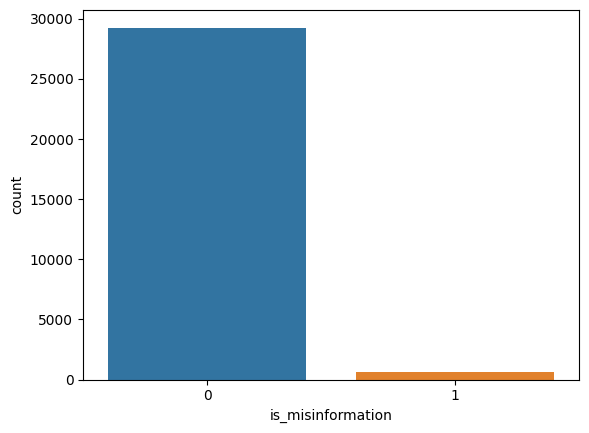

In [80]:
fig, ax = plt.subplots()
sns.countplot(data=data_cleaned, x="is_misinformation", ax=ax)
print("Percentage misinformation:", data_cleaned.is_misinformation.mean()*100)

In [81]:
pd.pivot_table(data=data_cleaned, index="is_misinformation", values=["user_followers", "user_friends", "user_favourites"], aggfunc=np.median)

,user_favourites,user_followers,user_friends
is_misinformation,,,
0,1640,953.0,506.0
1,5068,597.5,589.5


<Axes: xlabel='is_misinformation', ylabel='user_followers'>

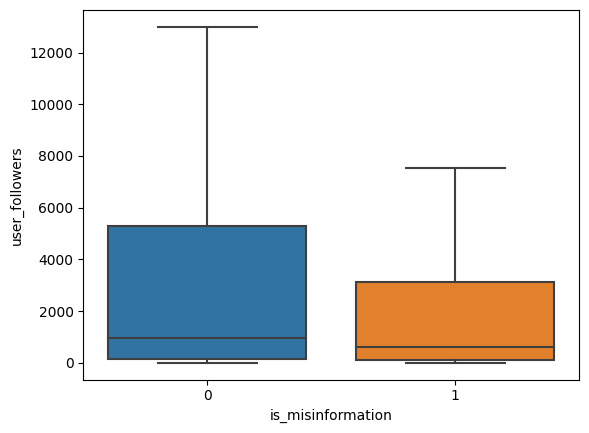

In [82]:
fig, ax = plt.subplots()
sns.boxplot(data=data_cleaned, y="user_followers", x="is_misinformation", showfliers=False)

<Axes: xlabel='is_misinformation', ylabel='user_favourites'>

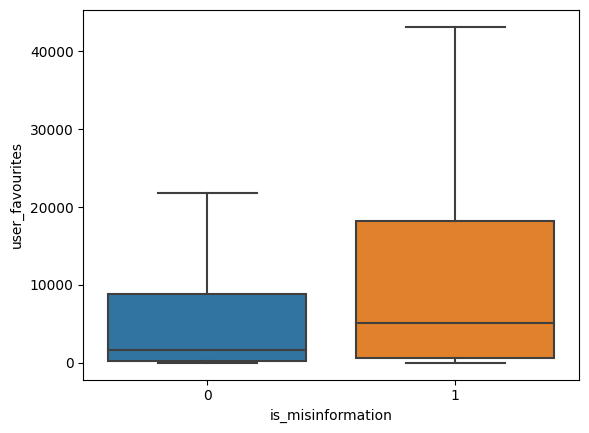

In [83]:
sns.boxplot(data=data_cleaned, y="user_favourites", x="is_misinformation", showfliers=False)

<Axes: xlabel='user_friends', ylabel='user_followers'>

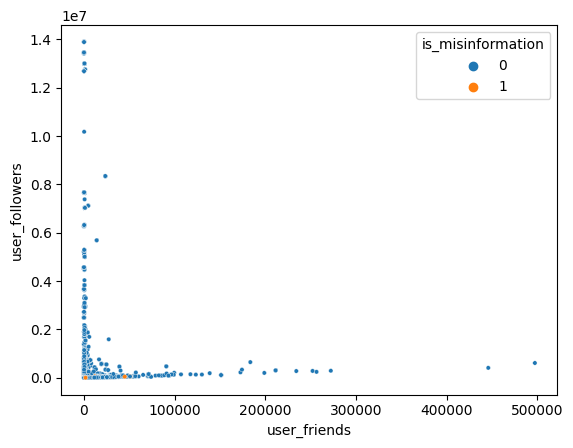

In [84]:
sns.scatterplot(data=data_cleaned, x="user_friends", y="user_followers", hue="is_misinformation", s=10)

<Axes: >

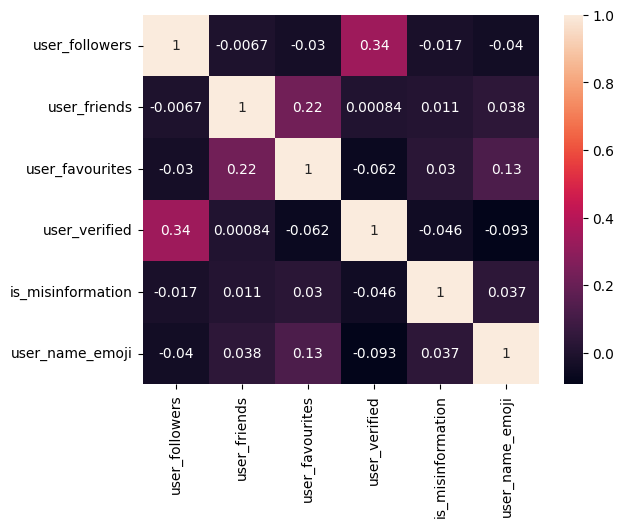

In [85]:
sns.heatmap(data_cleaned.corr(numeric_only=True), annot=True)

In [86]:
pd.crosstab(columns=data_cleaned["is_misinformation"], index=data_cleaned["country"]).sort_values(by=1, ascending=False)

is_misinformation,0,1
country,,
Other,16334,321
United States,4406,163
United Kingdom,1793,35
Canada,597,16
Australia,854,13
India,1942,13
Switzerland,229,4
Ireland,178,4
South Africa,407,4


In [87]:
pd.crosstab(columns=data_cleaned["is_misinformation"], index=data_cleaned["source"]).sort_values(by=1, ascending=False)

is_misinformation,0,1
source,,
other,16314,316
mobile,12949,282


In [95]:
pd.crosstab(columns=data_cleaned["is_misinformation"], index=data_cleaned["user_name_emoji"]).sort_values(by=1, ascending=False)

is_misinformation,0,1
user_name_emoji,,
0,26581,497
1,2682,101


In [96]:
pd.crosstab(columns=data_cleaned["is_misinformation"], index=data_cleaned["user_verified"]).sort_values(by=1, ascending=False)

is_misinformation,0,1
user_verified,,
0,25362,584
1,3901,14


<Axes: xlabel='date', ylabel='is_misinformation'>

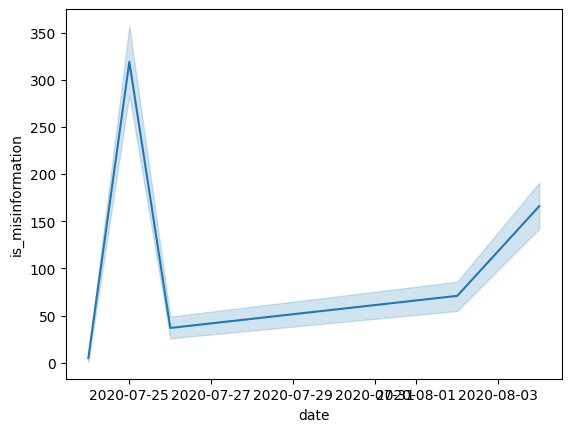

In [88]:
sns.lineplot(data=data_cleaned, x="date", y="is_misinformation", estimator="sum")

In [91]:
data_cleaned["date"].max()

datetime.date(2020, 8, 4)

## Modelo de clustering

In [98]:
from sklearn.cluster import KMeans

In [100]:
model_data = data_cleaned.drop(columns=["user_created", "date", "source", "country"])

In [101]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(model_data)
labels = kmeans_model.predict(model_data)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [102]:
data_cleaned["label"] = labels

<Axes: xlabel='user_friends', ylabel='user_followers'>

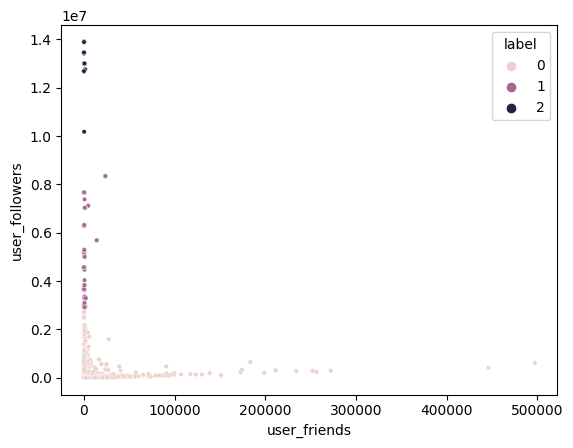

In [105]:
sns.scatterplot(data=data_cleaned, x="user_friends", y="user_followers", hue="label", s=10)

In [106]:
pd.crosstab(columns=data_cleaned["is_misinformation"], index=data_cleaned["label"]).sort_values(by=1, ascending=False)

is_misinformation,0,1
label,,
0,28925,597
1,272,1
2,66,0
